In [22]:
import ast 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
from matplotlib.ticker import FuncFormatter
#loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
#print("All imports successful!")

#Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) # to change job skill list into data type

#Fileter for Data Analyst data


In [23]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
 

In [24]:

df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
#create a new column for the month numbere
df_DA['job_posted_month_no'] =df_DA['job_posted_date'].dt.month

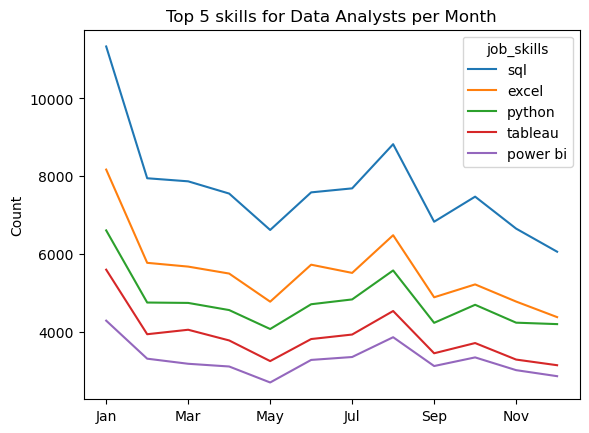

In [25]:

#Explode the skills column and pivot
df_DA_explode= df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

#sort the skills by count
df_DA_pivot.loc['Total'] =df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

#use month name for plotting
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(
    lambda x: pd.to_datetime(str(int(x)), format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')

#Get the top 5 skills
df_DA_pivot.iloc[:, :5].plot(kind='line')

plt.title('Top 5 skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()


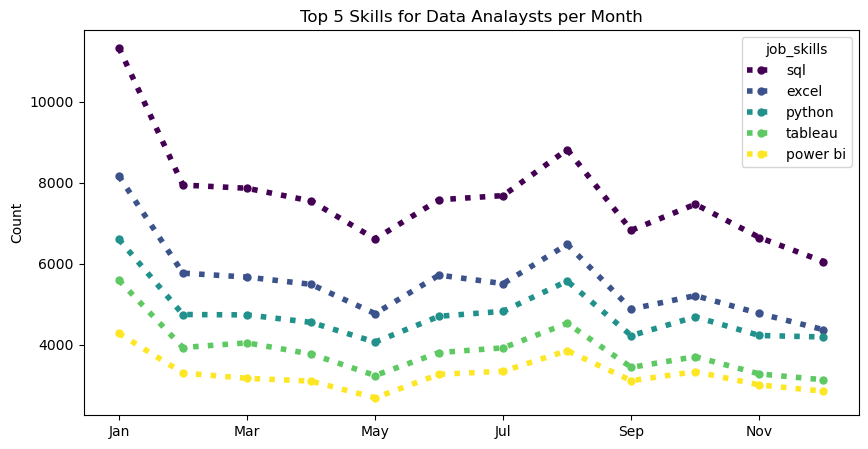

In [26]:
df_DA_pivot.iloc[:, :5].plot(kind='line', 
linewidth=4, 
linestyle=':', # diffrent options for linestyle; '--', '-','-.'
colormap='viridis',
marker ='o', # diffrent options: 'o','x','+','s'
markersize = 5,
figsize=(10, 5)
)
plt.title('Top 5 Skills for Data Analaysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

In [27]:
df_exploded = df.explode('job_skills')

skill_status= df_exploded.groupby('job_skills').agg(
    skill_count =('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median'))

In [28]:
skill_count = 20
skills_stats =skill_status.sort_values(by='skill_count', ascending=False).head(skill_count)

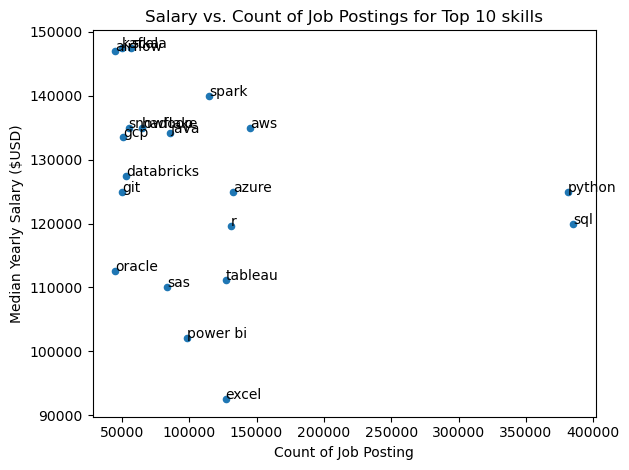

In [29]:
skills_stats.plot(kind='scatter', x='skill_count', y='median_salary')
#gca means get current access 
plt.xlabel('Count of Job Posting')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs. Count of Job Postings for Top 10 skills')
plt.tight_layout()
for i, txt in enumerate(skills_stats.index):
    #print(i, txt)
    plt.text(skills_stats['skill_count'].iloc[i], skills_stats['median_salary'].iloc[i], txt)
plt.show()

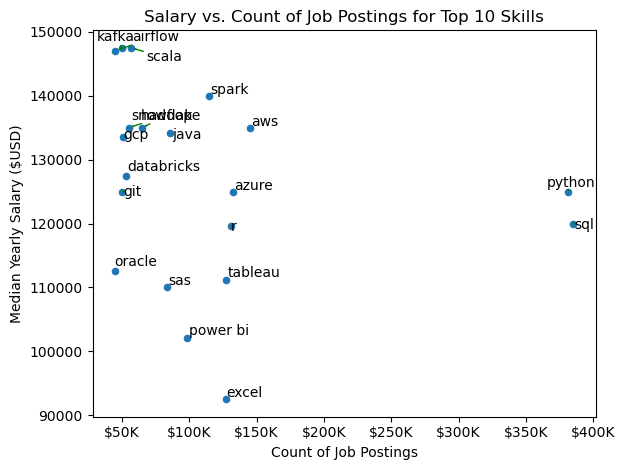

In [30]:
from adjustText import adjust_text
# Scatter plot
skills_stats.plot(kind='scatter', x='skill_count', y='median_salary')

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
# Add text labels and adjust them
texts = []
for i, txt in enumerate(skills_stats.index):
    texts.append(
        plt.text(
            skills_stats['skill_count'].iloc[i],   # x-coordinate
            skills_stats['median_salary'].iloc[i], # y-coordinate
            txt                                   # <-- label text (missing before)
        )
    )

# Automatically adjust labels to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='green', lw=1))

plt.show()
